# CSCE 5063 Machine Learning Mini Project 3 Submission
# Manuel Serna-Aguilera

# Mini-project 3 : Piecewise Regression and Resampling Techniques
   
-Dataset Ames Housing Dataset

This mini-project involves:    
- Piecewise Linear and Piecewise Polynomial Regression    
- Resampling Techniques: k-fold cross validation and bootstrapping

Submission: 

For this project, you will submit your .ipynb file through Blackboard. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn

import LRGD

## Task 1: Piecewise Regression

For the Housing Dataset from mini-project2 :   

a. Randomly split the dataset into 80% training set and 20% validation set. (Feel free to write your own function to split data or use scikit learn functions)  
b. Perform:   
i)Multiple Linear Regression,  ii)Polynomial Regression of degree 2, iii)Piecewise Linear Regression (Split/cut K = 5, i.e. 6 bins), and iv) Spline with d = 3 and K = 3. 
          
Report:  
1. Epochs vs Training Error curve for all 4 models in b.    
2. Validation error for all 4 models.  Which one has the best Training and Validation Error?

Note :   

- Make sure you use all 5 input variables from Housing Data and same training and validation set from a) for all models in b.     
- You can still use the LRGD class you created in project 2 or use scikit learn. You just need to create new varaibles using appropriate indicator functions , express it as a additive model and use LRGD or use scikit learn.   
- Refer to general regression equation form for each models ii) to iv) on how to create new variables. 

Food for Thought:   
Q. Why we can still use LRGD we created on Task 1 for Polynomial, Piecewise and Splines? If you think, we cannot use the same Gradient Descent from LRGD, why not?

    



In [2]:
# Import Housing dataset
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv(
    'http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
    sep='\t', 
    usecols=columns
)
df.head() 

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [3]:
# Preprocess dataset
df = df.dropna(axis=0) # drop rows with incomplete data entries

# Convert categorical var CentralAir to dummy values
df['Central Air'] = pd.factorize(df['Central Air'])[0]
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,0,1656,215000
1,5,6,882.0,0,896,105000
2,6,6,1329.0,0,1329,172000
3,7,5,2110.0,0,2110,244000
4,5,5,928.0,0,1629,189900


In [4]:
# Get data from pandas dataframe
names = ['Overall Qual', 'Overall Cond', 'Total Bsmt SF', 'Central Air', 'Gr Liv Area']
X = df[names].values
y = df['SalePrice'].values

In [5]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
y_std = StandardScaler().fit_transform(y[:, np.newaxis]).flatten()

In [6]:
# (a) Randomly split dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

### i) Multiple Linear Regression

In [7]:
mlr_model = LRGD.LRGD()
mlr_model.fit(x_train, y_train)

### ii) Polynomial Regression of degree 2

In [8]:
# NOTE: interaction variables tossed out
from sklearn.preprocessing import PolynomialFeatures

poly_x = PolynomialFeatures(2)
x_train_poly = poly_x.fit_transform(x_train)

In [9]:
x_train_poly.shape # 1+5+5+2*5

(2343, 21)

In [10]:
poly_model = LRGD.LRGD()
poly_model.fit(x_train_poly, y_train)

### iii) Piecewise Linear Regression (split/cut K = 5, i.e. 6 bins)

In [11]:
K = 5 # num bins

4.890330539374585
-2.38710427022307


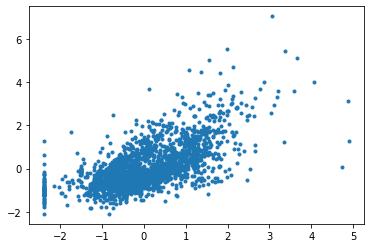

In [12]:
# Get an idea as to which points to cut with respect to 
#  the 'Total Bsmt ST' variable (index = 2)
print(np.max(x_train[:, 2]))
print(np.min(x_train[:, 2]))

plt.scatter(x_train[:, 2], y_train, marker='.')

In [13]:
input_idx = 2 # Sort and split dataset according to predictor at this index
idxs = np.argsort(x_train[:, input_idx])

sorted_x_train = x_train[idxs[::1]]
sorted_y_train = y_train[idxs[::1]]

In [14]:
# Split dataset evenly to our K+1 bins
y_train_bins = np.array_split(sorted_y_train, K+1)
x_train_bins = np.array_split(sorted_x_train, K+1)

min: -0.7640955712641422
max: -0.432684004763438


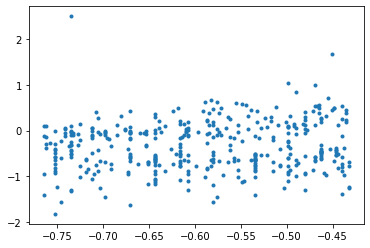

In [15]:
# Showcase a single bin
bin_idx = 1

print('min: {}'.format(np.min(x_train_bins[bin_idx][:,input_idx])))
print('max: {}'.format(np.max(x_train_bins[bin_idx][:,input_idx])))

plt.scatter(
    x_train_bins[bin_idx][:,input_idx], 
    y_train_bins[bin_idx], 
    marker='.'
)

In [16]:
# Now, perform linear regression on each training bin
bin_models = []

for i in range(K+1):
    bin_models += [LRGD.LRGD()]
    bin_models[i].fit(
        x_train_bins[i], 
        y_train_bins[i]
    )

In [17]:
for i in range(K+1):
    print(bin_models[i].beta)

[ 0.20189979 -0.00803341  0.18937643 -0.09064591  0.21426993]
[ 0.21322779 -0.0012678   0.09968823 -0.08718482  0.20376115]
[ 0.235826   -0.00898043  0.0494288  -0.05430064  0.24964872]
[ 0.27666498  0.03722466  0.01549918 -0.0814602   0.30165412]
[ 0.2958414   0.01033101  0.0724203  -0.03772562  0.29277846]
[ 0.53315102 -0.00750214  0.25849109 -0.04885068  0.34980136]


### iv) Spline with d = 3 and K = 3

### (b) i) Epochs vs. Training Error

In [18]:
# TODO
''' for each of the models in (a)

print('LR coefficient beta = ', model.beta)
print('LR intercept = ', SLR.intercept)
plt.plot(range(1, SLR.n_iter+1), model.losses)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.title('APPROACH HERE: Training Error vs Epochs')
plt.show()
'''

### (b) ii) Report Training and Validation Error

In [19]:
# TODO
''' perform model.evaluate(x_val, y_val) (all sets should be standardized) 
for all models in (a)
'''

### Task 2: Ridge Regression and LASSO

1. For Housing Data, perform Ridge Regression and LASSO for the training data set from Task 1 for different values of lambda.   
    
    Report:    
    1. Values of lambda vs training error curve. 
    2. Values of lambda vs validation error. 
    3. Compare Validarion Error from MLR in Task 1 to Validation Error from Ridge and LASSO. 

    Do not forget to standarize all inputs. For Ridge and Lasso, we have not implemented our own solver. Please use scikit learn library. 
    

### Task 3: Resampling

For the Housing Data: (Complete Data set, not only training from Task 1)

1. Cross Validation: Perform Multiple Linear Regression with K-fold cross validation. You can choose K = 5.    
Report: 
    a. Regression Coeffs for each dataset. 
    b. Cross validation Error. 

2. Bootstrapping: Create 10 different datasets each with 3N/4 data samples using bootstrapping (i.e. Resampling with replacement), where N = total numbers of data samples in Housing Data. Perform Multiple Linear Regression on 10 datasets you created.

Report:   

a. Regression Coeffs for each dataset.  
b. Average error. 

You can write your own resample fucntions but feel free to use scikit learn resample. 



